In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Pre processing img data 

In [2]:
train_dir = r"F:\Datasets\cifar-10-img\train"
test_dir = r"F:\Datasets\cifar-10-img\test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


#### Selecting only first batch with 5000 images as train and test data

In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [10]:
# Load VGG16 without top layers
weights_path = r"F:\Datasets\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [11]:
for layer in base_model.layers:
   layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [12]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.2968 - loss: 1.9492 - val_accuracy: 0.4360 - val_loss: 1.5873
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.4402 - loss: 1.5889 - val_accuracy: 0.4920 - val_loss: 1.4262
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 385ms/step - accuracy: 0.4888 - loss: 1.4470 - val_accuracy: 0.5010 - val_loss: 1.3640
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 330ms/step - accuracy: 0.5168 - loss: 1.3597 - val_accuracy: 0.5010 - val_loss: 1.3411
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.5528 - loss: 1.2947 - val_accuracy: 0.5270 - val_loss: 1.3079
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 344ms/step - accuracy: 0.5688 - loss: 1.2313 - val_accuracy: 0.5380 - val_loss: 1.2961
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - accuracy: 0.5848 - loss: 1.1868 - val_accuracy: 0.5570 - val_loss: 1.2874
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 378ms/step - accuracy: 0.6042 - loss: 1.1297 - val_accu

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [14]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.1010 - loss: 2.3141 - val_accuracy: 0.1080 - val_loss: 2.3015
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.1068 - loss: 2.3022 - val_accuracy: 0.1080 - val_loss: 2.3012
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.1076 - loss: 2.3020 - val_accuracy: 0.1080 - val_loss: 2.3016
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0966 - loss: 2.3022 - val_accuracy: 0.0880 - val_loss: 2.3017
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.1082 - loss: 2.3020 - val_accuracy: 0.0880 - val_loss: 2.3021
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.1062 - loss: 2.3025 - val_accuracy: 0.0880 - val_loss: 2.3017
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 997ms/step - accuracy: 0.1080 - loss: 2.3018 - val_accuracy: 0.0880 - val_loss: 2.3017
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1090 - loss: 2.3019 - val_accuracy: 0.0880 - val_lo

In [15]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step


In [16]:
labels = list(test_generator.class_indices.keys())

Preditcted:  dog
Actual:  bird


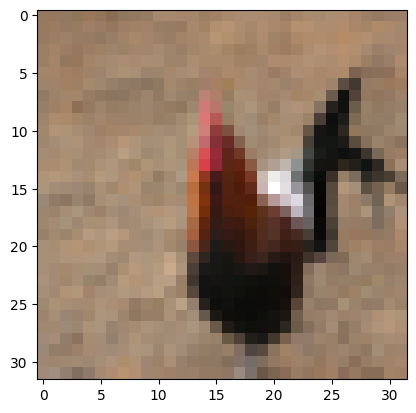

In [17]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])